### **1 MINUTE INTERVAL DATA IMPLEMENTATION**

## **IMPORT LIBRARIES**

In [1]:
import tensorflow as tf

In [3]:
import pytz

In [4]:
print(pytz. __version__)

2021.3


In [ ]:
!pip install yfinance 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas as pd

In [ ]:
import time

In [ ]:
from pandas_datareader import data as pdr 

# Market Data 
import yfinance as yf

# Graphing / Visualization 
import plotly.graph_objs as go 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from math import sqrt


In [ ]:
import datetime

In [ ]:
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten
from keras import optimizers
import numpy as np


In [ ]:
from tensorflow import keras

In [ ]:
from keras.models import Sequential

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
from matplotlib import pyplot


In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
from pandas import DataFrame

In [ ]:
from pandas import concat


In [ ]:
yf.pdr_override() 


# LOADING THE DATASET

In [ ]:
# Import the data frame (df) from yahoo finance using the specified stock as the ticker symbol
data_1_Minute  = yf.download(tickers='^DJI;',period='7d',interval='1m')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data_1_Minute = data_1_Minute.reset_index()

In [ ]:
data_1_Minute.dtypes

Datetime     datetime64[ns, America/New_York]
Open                                  float64
High                                  float64
Low                                   float64
Close                                 float64
Adj Close                             float64
Volume                                  int64
dtype: object

In [ ]:
data_1_Minute.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2022-09-07 09:30:00-04:00,31145.630859,31145.630859,31095.210938,31110.140625,31110.140625,0
1,2022-09-07 09:31:00-04:00,31111.320312,31141.259766,31108.210938,31139.140625,31139.140625,1851455
2,2022-09-07 09:32:00-04:00,31137.130859,31141.449219,31115.539062,31123.449219,31123.449219,1465345
3,2022-09-07 09:33:00-04:00,31127.720703,31127.720703,31101.679688,31121.679688,31121.679688,1155305
4,2022-09-07 09:34:00-04:00,31125.560547,31141.160156,31117.529297,31139.970703,31139.970703,1245284


In [ ]:
data_1_Minute.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume
2721,2022-09-15 15:56:00-04:00,31003.339844,31006.970703,30980.230469,30983.109375,30983.109375,2581889
2722,2022-09-15 15:57:00-04:00,30982.949219,30982.949219,30963.929688,30966.869141,30966.869141,2332871
2723,2022-09-15 15:58:00-04:00,30967.199219,30968.910156,30958.439453,30968.910156,30968.910156,2846964
2724,2022-09-15 15:59:00-04:00,30972.089844,30980.070312,30960.630859,30960.630859,30960.630859,5452960
2725,2022-09-15 16:00:00-04:00,30961.820312,30961.820312,30961.820312,30961.820312,30961.820312,0


In [ ]:
data_1_Minute.shape

(2726, 7)

# REMOVING THE MISSING VALUES FROM THE DATA

In [ ]:

data_1_Minute = data_1_Minute.fillna(0)

In [ ]:
data_1_Minute.shape

(2726, 7)

In [ ]:
data_1_Minute["Difference"] = data_1_Minute["Close"] - data_1_Minute["Open"]

# CHANGING THE DATETIME COLUMN INTO THE DATATIME FORMAT AND CREATING AN YEAR AND MONTH COLUMN

In [ ]:
data_1_Minute["Datetime"] = pd.to_datetime(data_1_Minute["Datetime"])

In [ ]:
data_1_Minute['year'] = pd.to_datetime(data_1_Minute["Datetime"]).dt.year

In [ ]:
data_1_Minute['month'] = pd.to_datetime(data_1_Minute["Datetime"]).dt.month

# SIMPLE MOVING AVERAGE

In [ ]:
data_1_Minute['10SMA'] = data_1_Minute.Close.rolling(14).mean()



In [ ]:
data_1_Minute['21SMA'] = data_1_Minute.Close.rolling(21).mean()



In [ ]:
data_1_Minute['40SMA'] = data_1_Minute.Close.rolling(40).mean()



In [ ]:
data_1_Minute['200SMA'] = data_1_Minute.Close.rolling(200).mean()





# Exponential Moving Average

In [ ]:
data_1_Minute['EMA'] = data_1_Minute.Close.ewm(span=14).mean()


# Bollinger Brands

In [ ]:
# Boillinger band calculations
data_1_Minute['TP'] = (data_1_Minute['Close'] + data_1_Minute['Low'] + data_1_Minute['High'])/3
data_1_Minute['std'] = data_1_Minute['TP'].rolling(20).std(ddof=2)
data_1_Minute['MA-TP'] = data_1_Minute['TP'].rolling(20).mean()
data_1_Minute['BOLINGER BRANDS-UPPER VALUE'] = data_1_Minute['MA-TP'] + 2*data_1_Minute['std']
data_1_Minute["BOLINGER BRANDS- LOWER VALUE"] = data_1_Minute['MA-TP'] - 2*data_1_Minute['std']

# Relative Strength Index

In [ ]:
delta = data_1_Minute['Close'].diff()
up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)
ema_up = up.ewm(com=70, adjust=False).mean()
ema_down = down.ewm(com=30, adjust=False).mean()
rs = ema_up/ema_down
data_1_Minute['RSI'] = 100 - (100/(1 + rs))

# Weighted Moving Avaerage

In [ ]:
weights = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
data_1_Minute['WMA'] = data_1_Minute['Close'].rolling(10).apply(lambda x: np.sum(weights*x))


# Average True Range

In [ ]:
data_1_Minute['TR'] = [max(tup) for tup in list(zip(data_1_Minute['High'] - data_1_Minute['Low'],
                                        (data_1_Minute['High'] - data_1_Minute['Close'].shift(1)).abs(),
                                        (data_1_Minute['Low']  - data_1_Minute['Close'].shift(1)).abs()))]

In [ ]:
data_1_Minute['ATR'] = data_1_Minute['TR'].ewm(span = 14).mean()




# Average Directional Movement Index

In [ ]:
def get_adx(high, low, Close, lookback):
    plus_dm = high.diff()
    minus_dm = low.diff()
    plus_dm[plus_dm < 0] = 0
    minus_dm[minus_dm > 0] = 0
    
    tr1 = pd.DataFrame(high - low)
    tr2 = pd.DataFrame(abs(high - Close.shift(1)))
    tr3 = pd.DataFrame(abs(low - Close.shift(1)))
    frames = [tr1, tr2, tr3]
    tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
    atr = tr.rolling(lookback).mean()
    
    plus_di = 100 * (plus_dm.ewm(alpha = 1/lookback).mean() / atr)
    minus_di = abs(100 * (minus_dm.ewm(alpha = 1/lookback).mean() / atr))
    dx = (abs(plus_di - minus_di) / abs(plus_di + minus_di)) * 100
    adx = ((dx.shift(1) * (lookback - 1)) + dx) / lookback
    adx_smooth = adx.ewm(alpha = 1/lookback).mean()
    return plus_di, minus_di, adx_smooth

data_1_Minute['plus_di'] = pd.DataFrame(get_adx(data_1_Minute['High'], data_1_Minute['Low'], data_1_Minute['Close'], 14)[0]).rename(columns = {0:'plus_di'})
data_1_Minute['minus_di'] = pd.DataFrame(get_adx(data_1_Minute['High'], data_1_Minute['Low'], data_1_Minute['Close'], 14)[1]).rename(columns = {0:'minus_di'})
data_1_Minute['adx'] = pd.DataFrame(get_adx(data_1_Minute['High'], data_1_Minute['Low'], data_1_Minute['Close'], 14)[2]).rename(columns = {0:'adx'})

# MOVING AVERAGE CONVERGENCE DIVERGENCE

In [ ]:
exp1 = data_1_Minute['Close'].ewm(span=12, adjust=False).mean()
exp2 = data_1_Minute['Close'].ewm(span=26, adjust=False).mean()
data_1_Minute['MACD'] = exp1 - exp2



# Calculating Stochastic Tehnical Indicator

In [ ]:
data_1_Minute['14-high'] = data_1_Minute['High'].rolling(14).max()
data_1_Minute['14-low'] = data_1_Minute['Low'].rolling(14).min()
data_1_Minute['%K'] = (data_1_Minute['Close'] - data_1_Minute['14-low'])*100/(data_1_Minute['14-high'] - data_1_Minute['14-low'])
data_1_Minute['%D'] = data_1_Minute['%K'].rolling(3).mean()

## **ALL THE TECHNICAL INDICATORS ARE CALCULATED CHECKING THE DATASET NOW **

In [ ]:
data_1_Minute_14 = data_1_Minute.iloc[15:,:]

In [ ]:
data_1_Minute_14.columns

Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Difference', 'year', 'month', '10SMA', '21SMA', '40SMA', '200SMA',
       'EMA', 'TP', 'std', 'MA-TP', 'BOLINGER BRANDS-UPPER VALUE',
       'BOLINGER BRANDS- LOWER VALUE', 'RSI', 'WMA', 'TR', 'ATR', 'plus_di',
       'minus_di', 'adx', 'MACD', '14-high', '14-low', '%K', '%D'],
      dtype='object')

In [ ]:
data_1_Minute_14.isnull().sum()

Datetime                          0
Open                              0
High                              0
Low                               0
Close                             0
Adj Close                         0
Volume                            0
Difference                        0
year                              0
month                             0
10SMA                             0
21SMA                             5
40SMA                            24
200SMA                          184
EMA                               0
TP                                0
std                               4
MA-TP                             4
BOLINGER BRANDS-UPPER VALUE       4
BOLINGER BRANDS- LOWER VALUE      4
RSI                               0
WMA                               0
TR                                0
ATR                               0
plus_di                           0
minus_di                          0
adx                               0
MACD                        

In [ ]:
data_1_Minute_14.drop(["40SMA", "200SMA"], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_1_Minute_14 = data_1_Minute_14.fillna(0)

In [ ]:
data_1_Minute_14.columns

Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Difference', 'year', 'month', '10SMA', '21SMA', 'EMA', 'TP', 'std',
       'MA-TP', 'BOLINGER BRANDS-UPPER VALUE', 'BOLINGER BRANDS- LOWER VALUE',
       'RSI', 'WMA', 'TR', 'ATR', 'plus_di', 'minus_di', 'adx', 'MACD',
       '14-high', '14-low', '%K', '%D'],
      dtype='object')

## **Implementation of the Next One Minute Interval Prediction with  Technical Indicators**

## **CHOOSING ONLY THE REQUIRED COLUMNS**

In [ ]:
data_1_Minute_14_ = data_1_Minute_14[['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume', 'Difference',
       '10SMA', '21SMA', 'EMA', 'BOLINGER BRANDS-UPPER VALUE',
       'BOLINGER BRANDS- LOWER VALUE', 'RSI', 'WMA', 'ATR', 'adx', 'MACD',  '%K', '%D']]

In [ ]:
data_1_Minute_14 = data_1_Minute_14[['Open', 'High', 'Low', 'Close', 'Volume', 'Difference',
       '10SMA', '21SMA',  'EMA', 'BOLINGER BRANDS-UPPER VALUE',
       'BOLINGER BRANDS- LOWER VALUE', 'RSI', 'WMA', 'ATR', 'adx', 'MACD',  '%K', '%D']]

In [ ]:
df_for_training = data_1_Minute_14[['Open', 'High', 'Low', 'Close', 'Volume', 'Difference',
        '10SMA', '21SMA', 'EMA', 'BOLINGER BRANDS-UPPER VALUE',
       'BOLINGER BRANDS- LOWER VALUE', 'RSI', 'WMA', 'ATR', 'adx', 'MACD',  '%K', '%D']].astype('float')

In [ ]:
data_1_Minute_14 = data_1_Minute_14.fillna(0)

In [ ]:

data_1_Minute_14.shape

(2711, 18)

In [ ]:
data_1_Minute_14.isnull().sum()

Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Difference                      0
10SMA                           0
21SMA                           0
EMA                             0
BOLINGER BRANDS-UPPER VALUE     0
BOLINGER BRANDS- LOWER VALUE    0
RSI                             0
WMA                             0
ATR                             0
adx                             0
MACD                            0
%K                              0
%D                              0
dtype: int64

In [ ]:
data_1_Minute_14.dtypes

Open                            float64
High                            float64
Low                             float64
Close                           float64
Volume                            int64
Difference                      float64
10SMA                           float64
21SMA                           float64
EMA                             float64
BOLINGER BRANDS-UPPER VALUE     float64
BOLINGER BRANDS- LOWER VALUE    float64
RSI                             float64
WMA                             float64
ATR                             float64
adx                             float64
MACD                            float64
%K                              float64
%D                              float64
dtype: object

In [ ]:
data_1_Minute_14.head(1)

,Open,High,Low,Close,Volume,Difference,10SMA,21SMA,EMA,BOLINGER BRANDS-UPPER VALUE,BOLINGER BRANDS- LOWER VALUE,RSI,WMA,ATR,adx,MACD,%K,%D
15,31269.050781,31278.699219,31266.730469,31277.929688,994179,8.878906,31208.657087,0.0,31231.301774,0.0,0.0,97.666555,171888.884766,23.182541,75.520691,41.038824,99.565285,96.408336


In [ ]:
scaler_dataframe = MinMaxScaler(feature_range=(0,1))
scaler_dataframe.fit_transform(np.array(data_1_Minute_14["Difference"]).reshape(-1, 1))

array([[0.6208315 ],
       [0.62825033],
       [0.53516233],
       ...,
       [0.59387395],
       [0.54434406],
       [0.5874394 ]])

## **CONVERTING THE DATA FRAME INTO AN ARRAY**

In [ ]:
values = data_1_Minute_14.values

In [ ]:
values = values.astype('float32')

In [ ]:
values

array([[3.1269051e+04, 3.1278699e+04, 3.1266730e+04, ..., 4.1038826e+01,
        9.9565285e+01, 9.6408333e+01],
       [3.1277949e+04, 3.1289461e+04, 3.1273430e+04, ..., 4.2928608e+01,
        9.9648445e+01, 9.8648338e+01],
       [3.1289381e+04, 3.1290010e+04, 3.1269340e+04, ..., 4.2857407e+01,
        9.1576263e+01, 9.6930000e+01],
       ...,
       [3.0967199e+04, 3.0968910e+04, 3.0958439e+04, ..., 1.2167431e+01,
        5.4578907e+01, 5.8514793e+01],
       [3.0972090e+04, 3.0980070e+04, 3.0960631e+04, ..., 1.1164341e+01,
        4.6538315e+01, 5.1237988e+01],
       [3.0961820e+04, 3.0961820e+04, 3.0961820e+04, ..., 1.0346100e+01,
        4.7693474e+01, 4.9603565e+01]], dtype=float32)

In [ ]:
len(values)

2711

In [ ]:
train_dates = pd.to_datetime(data_1_Minute_14_['Datetime'])

In [ ]:
len(data_1_Minute_14.columns)

18

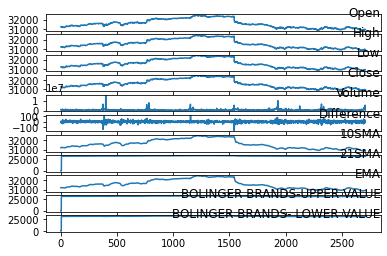

In [ ]:
values = data_1_Minute_14.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(data_1_Minute_14.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

In [ ]:
reframed = series_to_supervised(scaled, 1, 1)

In [ ]:
reframed.shape

(2710, 36)

In [ ]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t),var16(t),var17(t),var18(t)
1,0.238028,0.237327,0.239383,0.243789,0.065077,0.620831,0.194918,0.0,0.207334,0.000000,...,0.212694,0.000000,0.000000,1.000000,0.228459,0.192948,0.988709,0.833892,0.996484,0.986427
2,0.243541,0.244025,0.243552,0.250531,0.070203,0.628250,0.202390,0.0,0.212694,0.000000,...,0.215987,0.000000,0.000000,0.980976,0.231689,0.190429,1.000000,0.833603,0.915763,0.969171
3,0.250623,0.244367,0.241007,0.242270,0.055570,0.535162,0.209339,0.0,0.215987,0.000000,...,0.218510,0.000000,0.000000,0.977575,0.233752,0.173934,0.988515,0.830462,0.883030,0.931473
4,0.241992,0.239375,0.241281,0.240471,0.048565,0.576649,0.215332,0.0,0.218510,0.000000,...,0.220180,0.958383,0.958186,0.970775,0.234457,0.152136,0.979698,0.824366,0.829382,0.875538
5,0.240902,0.234209,0.238997,0.237221,0.044774,0.563560,0.220563,0.0,0.220180,0.958383,...,0.219505,0.958369,0.958617,0.938062,0.231994,0.163355,0.954175,0.810145,0.532552,0.747266


In [ ]:
reframed.min()

var1(t-1)     0.0
var2(t-1)     0.0
var3(t-1)     0.0
var4(t-1)     0.0
var5(t-1)     0.0
var6(t-1)     0.0
var7(t-1)     0.0
var8(t-1)     0.0
var9(t-1)     0.0
var10(t-1)    0.0
var11(t-1)    0.0
var12(t-1)    0.0
var13(t-1)    0.0
var14(t-1)    0.0
var15(t-1)    0.0
var16(t-1)    0.0
var17(t-1)    0.0
var18(t-1)    0.0
var1(t)       0.0
var2(t)       0.0
var3(t)       0.0
var4(t)       0.0
var5(t)       0.0
var6(t)       0.0
var7(t)       0.0
var8(t)       0.0
var9(t)       0.0
var10(t)      0.0
var11(t)      0.0
var12(t)      0.0
var13(t)      0.0
var14(t)      0.0
var15(t)      0.0
var16(t)      0.0
var17(t)      0.0
var18(t)      0.0
dtype: float64

In [ ]:
reframed.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var9(t-1)', 'var10(t-1)',
       'var11(t-1)', 'var12(t-1)', 'var13(t-1)', 'var14(t-1)', 'var15(t-1)',
       'var16(t-1)', 'var17(t-1)', 'var18(t-1)', 'var1(t)', 'var2(t)',
       'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)', 'var7(t)', 'var8(t)',
       'var9(t)', 'var10(t)', 'var11(t)', 'var12(t)', 'var13(t)', 'var14(t)',
       'var15(t)', 'var16(t)', 'var17(t)', 'var18(t)'],
      dtype='object')

In [ ]:
reframed.shape

(2710, 36)

In [ ]:
reframed.drop(reframed.columns[[18, 19, 20, 21,22,  24,25,   26, 27, 28, 29, 30, 31, 32, 33, 34, 35]], axis=1, inplace=True)


In [ ]:
# Var6(t) is my output column, except all others are my input columns
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.238028   0.237327   0.239383   0.243789   0.065077   0.620831   
2   0.243541   0.244025   0.243552   0.250531   0.070203   0.628250   
3   0.250623   0.244367   0.241007   0.242270   0.055570   0.535162   
4   0.241992   0.239375   0.241281   0.240471   0.048565   0.576649   
5   0.240902   0.234209   0.238997   0.237221   0.044774   0.563560   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)  var12(t-1)  \
1   0.194918        0.0   0.207334    0.000000    0.000000    0.999322   
2   0.202390        0.0   0.212694    0.000000    0.000000    1.000000   
3   0.209339        0.0   0.215987    0.000000    0.000000    0.980976   
4   0.215332        0.0   0.218510    0.000000    0.000000    0.977575   
5   0.220563        0.0   0.220180    0.958383    0.958186    0.970775   

   var13(t-1)  var14(t-1)  var15(t-1)  var16(t-1)  var17(t-1)  var18(t-1)  \
1    0.222689    0.205382    0.976816    0.826238  

In [ ]:
values = reframed.values

train_data = int(len(values)*0.8)

In [ ]:
train_data

2168

In [ ]:
train = values[:train_data, :]
test = values[train_data:, :]

In [ ]:
train.shape

(2168, 19)

In [ ]:
train

array([[0.23802846, 0.23732706, 0.23938315, ..., 0.99565285, 0.9639328 ,
        0.62825033],
       [0.24354113, 0.24402534, 0.24355234, ..., 0.99648444, 0.98642672,
        0.53516233],
       [0.25062314, 0.24436694, 0.24100707, ..., 0.91576265, 0.96917129,
        0.57664904],
       ...,
       [0.19171285, 0.1847887 , 0.1830675 , ..., 0.02325781, 0.21834517,
        0.55543558],
       [0.18115093, 0.17483731, 0.17767187, ..., 0.02137767, 0.10925578,
        0.55825621],
       [0.17557535, 0.16857545, 0.17316598, ..., 0.00244499, 0.01156736,
        0.60763185]])

In [ ]:
test.shape

(542, 19)

In [ ]:
history_points = 50

In [ ]:
train_x =      np.array([train[:, :-1][i  : i + history_points].copy() for i in range(len(train) - history_points)])


In [ ]:
train_x.shape

(2118, 50, 18)

In [ ]:
train_y = np.array([train[:, -1][i + history_points].copy() for i in range(len(train) - history_points)])


In [ ]:
train_y.shape

(2118,)

In [ ]:
test_x =      np.array([test[:, :-1][i  : i + history_points].copy() for i in range(len(test) - history_points)])


In [ ]:
test_x.shape

(492, 50, 18)

In [ ]:
test_y = np.array([test[:, -1][i + history_points].copy() for i in range(len(test) - history_points)])


In [ ]:
test_y.shape

(492,)

## **Implementing CONV1D**

In [ ]:
model=Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(50,18)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Epoch 1/100
67/67 - 12s - loss: 0.0433 - val_loss: 0.0067 - 12s/epoch - 176ms/step
Epoch 2/100
67/67 - 0s - loss: 0.0062 - val_loss: 0.0046 - 244ms/epoch - 4ms/step
Epoch 3/100
67/67 - 0s - loss: 0.0045 - val_loss: 0.0048 - 203ms/epoch - 3ms/step
Epoch 4/100
67/67 - 0s - loss: 0.0039 - val_loss: 0.0043 - 198ms/epoch - 3ms/step
Epoch 5/100
67/67 - 0s - loss: 0.0058 - val_loss: 0.0047 - 200ms/epoch - 3ms/step
Epoch 6/100
67/67 - 0s - loss: 0.0077 - val_loss: 0.0043 - 208ms/epoch - 3ms/step
Epoch 7/100
67/67 - 0s - loss: 0.0086 - val_loss: 0.0224 - 202ms/epoch - 3ms/step
Epoch 8/100
67/67 - 0s - loss: 0.0060 - val_loss: 0.0053 - 241ms/epoch - 4ms/step
Epoch 9/100
67/67 - 0s - loss: 0.0071 - val_loss: 0.0052 - 237ms/epoch - 4ms/step
Epoch 10/100
67/67 - 0s - loss: 0.0052 - val_loss: 0.0037 - 238ms/epoch - 4ms/step
Epoch 11/100
67/67 - 0s - loss: 0.0064 - val_loss: 0.0041 - 207ms/epoch - 3ms/step
Epoch 12/100
67/67 - 0s - loss: 0.0082 - val_loss: 0.0044 - 201ms/epoch - 3ms/step
Epoch 13/100

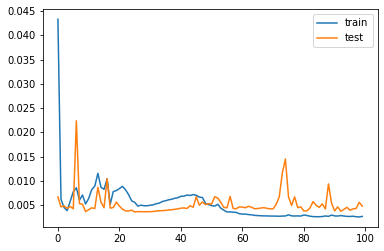

In [ ]:
history = model.fit(train_x, train_y, epochs=100, batch_size=32, validation_data=(test_x, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
yhat_train = model.predict(train_x)


In [ ]:
yhat_train

array([[0.55277514],
       [0.56472725],
       [0.5537858 ],
       ...,
       [0.55009705],
       [0.5804134 ],
       [0.6066825 ]], dtype=float32)

In [ ]:
yhat_train.shape

(2118, 1)

In [ ]:
train_x.shape

(2118, 50, 18)

In [ ]:
y_test_predicted = model.predict(test_x)


In [ ]:
y_test_predicted.shape

(492, 1)

In [ ]:
y_test_predicted = scaler_dataframe.inverse_transform(y_test_predicted)


In [ ]:
y_test_predicted

array([[ 3.44778985e-01],
       [-2.03041458e+00],
       [ 2.03169155e+00],
       [ 6.04382038e-01],
       [ 1.12499237e-01],
       [-3.84124899e+00],
       [-7.81369877e+00],
       [-6.10470867e+00],
       [-4.44022179e+00],
       [-1.19320040e+01],
       [-1.42979107e+01],
       [-1.12682571e+01],
       [-1.15134058e+01],
       [-9.86177254e+00],
       [-8.89242935e+00],
       [-1.20510445e+01],
       [-1.38232708e+01],
       [-1.32512884e+01],
       [-1.39362097e+01],
       [-1.21036777e+01],
       [-1.14748936e+01],
       [-1.93076954e+01],
       [-2.45013561e+01],
       [-2.28752251e+01],
       [-1.61638985e+01],
       [-1.58216124e+01],
       [-1.54157887e+01],
       [-1.14482355e+01],
       [-1.14062996e+01],
       [-1.37964230e+01],
       [-1.65798187e+01],
       [-1.83124561e+01],
       [-1.47151451e+01],
       [-1.11692657e+01],
       [-1.02818604e+01],
       [-1.05010805e+01],
       [-8.83437538e+00],
       [-1.49020977e+01],
       [-1.6

In [ ]:
y_test_predicted.shape

(492, 1)

In [ ]:
y_predicted_train = model.predict(train_x)
y_predicted_train = scaler_dataframe.inverse_transform(y_predicted_train)

In [ ]:
y_predicted_train

array([[-9.217171 ],
       [-6.0391264],
       [-8.94844  ],
       ...,
       [-9.929273 ],
       [-1.8682023],
       [ 5.1167045]], dtype=float32)

In [ ]:
test_y

array([0.614632  , 0.60425297, 0.62320405, 0.5558102 , 0.55171147,
       0.61970765, 0.58541208, 0.5399809 , 0.64422653, 0.54941971,
       0.58367857, 0.60135155, 0.68029969, 0.61959747, 0.61106214,
       0.57578228, 0.58965771, 0.59112678, 0.59608491, 0.57107389,
       0.56751139, 0.61391949, 0.60240194, 0.5579477 , 0.59281622,
       0.54814162, 0.49898634, 0.51485236, 0.62685471, 0.54866314,
       0.59526223, 0.69225062, 0.5979286 , 0.57374761, 0.5720949 ,
       0.48123255, 0.52350522, 0.61541795, 0.55641252, 0.56776847,
       0.5796533 , 0.60503893, 0.66765829, 0.54719406, 0.56065815,
       0.54855296, 0.57653151, 0.64403555, 0.64468195, 0.60673571,
       0.54991186, 0.67750845, 0.51447774, 0.55727193, 0.53843103,
       0.56258264, 0.48548553, 0.46521228, 0.49609226, 0.55847657,
       0.64328632, 0.66148817, 0.54806082, 0.69676803, 0.61918613,
       0.59590128, 0.57664904, 0.55227707, 0.52343176, 0.53873219,
       0.70138828, 0.61391215, 0.42147789, 0.52659027, 0.60000

In [ ]:
test_y_ = test_y.reshape(1,-1)

In [ ]:
test_y_

array([[0.614632  , 0.60425297, 0.62320405, 0.5558102 , 0.55171147,
        0.61970765, 0.58541208, 0.5399809 , 0.64422653, 0.54941971,
        0.58367857, 0.60135155, 0.68029969, 0.61959747, 0.61106214,
        0.57578228, 0.58965771, 0.59112678, 0.59608491, 0.57107389,
        0.56751139, 0.61391949, 0.60240194, 0.5579477 , 0.59281622,
        0.54814162, 0.49898634, 0.51485236, 0.62685471, 0.54866314,
        0.59526223, 0.69225062, 0.5979286 , 0.57374761, 0.5720949 ,
        0.48123255, 0.52350522, 0.61541795, 0.55641252, 0.56776847,
        0.5796533 , 0.60503893, 0.66765829, 0.54719406, 0.56065815,
        0.54855296, 0.57653151, 0.64403555, 0.64468195, 0.60673571,
        0.54991186, 0.67750845, 0.51447774, 0.55727193, 0.53843103,
        0.56258264, 0.48548553, 0.46521228, 0.49609226, 0.55847657,
        0.64328632, 0.66148817, 0.54806082, 0.69676803, 0.61918613,
        0.59590128, 0.57664904, 0.55227707, 0.52343176, 0.53873219,
        0.70138828, 0.61391215, 0.42147789, 0.52

In [ ]:
test_y_ = scaler_dataframe.inverse_transform(test_y_)

In [ ]:
test_y_

array([[ 7.23046875e+00,  4.47070312e+00,  9.50976563e+00,
        -8.41015625e+00, -9.50000000e+00,  8.58007812e+00,
        -5.39062500e-01, -1.26191406e+01,  1.50996094e+01,
        -1.01093750e+01, -1.00000000e+00,  3.69921875e+00,
         2.46914062e+01,  8.55078125e+00,  6.28125000e+00,
        -3.09960938e+00,  5.89843750e-01,  9.80468750e-01,
         2.29882813e+00, -4.35156250e+00, -5.29882813e+00,
         7.04101562e+00,  3.97851562e+00, -7.84179688e+00,
         1.42968750e+00, -1.04492187e+01, -2.35195312e+01,
        -1.93007812e+01,  1.04804687e+01, -1.03105469e+01,
         2.08007812e+00,  2.78691406e+01,  2.78906250e+00,
        -3.64062500e+00, -4.08007812e+00, -2.82402344e+01,
        -1.70000000e+01,  7.43945312e+00, -8.25000000e+00,
        -5.23046875e+00, -2.07031250e+00,  4.67968750e+00,
         2.13300781e+01, -1.07011719e+01, -7.12109375e+00,
        -1.03398437e+01, -2.90039063e+00,  1.50488281e+01,
         1.52207031e+01,  5.13085937e+00, -9.97851563e+0

In [ ]:
test_y_ = test_y_.reshape(-1,1)

In [ ]:
test_y_.shape

(492, 1)

In [ ]:
test_y_

array([[ 7.23046875e+00],
       [ 4.47070312e+00],
       [ 9.50976563e+00],
       [-8.41015625e+00],
       [-9.50000000e+00],
       [ 8.58007812e+00],
       [-5.39062500e-01],
       [-1.26191406e+01],
       [ 1.50996094e+01],
       [-1.01093750e+01],
       [-1.00000000e+00],
       [ 3.69921875e+00],
       [ 2.46914062e+01],
       [ 8.55078125e+00],
       [ 6.28125000e+00],
       [-3.09960938e+00],
       [ 5.89843750e-01],
       [ 9.80468750e-01],
       [ 2.29882813e+00],
       [-4.35156250e+00],
       [-5.29882813e+00],
       [ 7.04101562e+00],
       [ 3.97851562e+00],
       [-7.84179688e+00],
       [ 1.42968750e+00],
       [-1.04492187e+01],
       [-2.35195312e+01],
       [-1.93007812e+01],
       [ 1.04804687e+01],
       [-1.03105469e+01],
       [ 2.08007812e+00],
       [ 2.78691406e+01],
       [ 2.78906250e+00],
       [-3.64062500e+00],
       [-4.08007812e+00],
       [-2.82402344e+01],
       [-1.70000000e+01],
       [ 7.43945312e+00],
       [-8.2

In [ ]:
y_test_predicted[0:25]

array([[  0.34477898],
       [ -2.0304146 ],
       [  2.0316916 ],
       [  0.60438204],
       [  0.11249924],
       [ -3.841249  ],
       [ -7.813699  ],
       [ -6.1047087 ],
       [ -4.440222  ],
       [-11.932004  ],
       [-14.297911  ],
       [-11.268257  ],
       [-11.513406  ],
       [ -9.861773  ],
       [ -8.892429  ],
       [-12.051044  ],
       [-13.823271  ],
       [-13.251288  ],
       [-13.93621   ],
       [-12.103678  ],
       [-11.474894  ],
       [-19.307695  ],
       [-24.501356  ],
       [-22.875225  ],
       [-16.163898  ]], dtype=float32)

In [ ]:
# calculate RMSE
rmse = sqrt(mean_squared_error(test_y_, y_test_predicted))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 18.404


In [ ]:
r2_score(test_y_, y_test_predicted)

-0.405520884373493

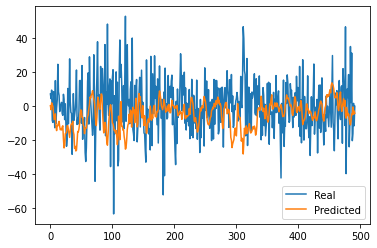

In [ ]:
real = plt.plot(test_y_, label='real')
pred = plt.plot(y_test_predicted, label='predicted')

# real = plt.plot(unscaled_y[start:end], label='real')
# pred = plt.plot(y_predicted[start:end], label='predicted')

plt.legend(['Real', 'Predicted'])

plt.show()

**Prediction for the Next 15 Minutes**

In [ ]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var6(t)
1,0.238028,0.237327,0.239383,0.243789,0.065077,0.620831,0.194918,0.000000,0.207334,0.000000,0.000000,0.999322,0.222689,0.205382,0.976816,0.826238,0.995653,0.963933,0.628250
2,0.243541,0.244025,0.243552,0.250531,0.070203,0.628250,0.202390,0.000000,0.212694,0.000000,0.000000,1.000000,0.228459,0.192948,0.988709,0.833892,0.996484,0.986427,0.535162
3,0.250623,0.244367,0.241007,0.242270,0.055570,0.535162,0.209339,0.000000,0.215987,0.000000,0.000000,0.980976,0.231689,0.190429,1.000000,0.833603,0.915763,0.969171,0.576649
4,0.241992,0.239375,0.241281,0.240471,0.048565,0.576649,0.215332,0.000000,0.218510,0.000000,0.000000,0.977575,0.233752,0.173934,0.988515,0.830462,0.883030,0.931473,0.563560
5,0.240902,0.234209,0.238997,0.237221,0.044774,0.563560,0.220563,0.000000,0.220180,0.958383,0.958186,0.970775,0.234457,0.152136,0.979698,0.824366,0.829382,0.875538,0.498876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,0.569930,0.064358,0.054168,0.071698,0.162200,0.705230,0.032659,0.952749,0.029343,0.947826,0.951954,0.397808,0.039424,0.281395,0.237306,0.706231,0.851992,0.691891,0.511356
2707,0.608133,0.068198,0.061083,0.060950,0.169005,0.511356,0.035052,0.952859,0.031969,0.948048,0.951983,0.377644,0.042717,0.276902,0.254819,0.711823,0.683687,0.718106,0.526965
2708,0.592453,0.053247,0.050938,0.050878,0.152705,0.526965,0.036117,0.952951,0.032864,0.948072,0.952195,0.360290,0.043651,0.261018,0.271964,0.710368,0.525967,0.685904,0.593874
2709,0.584913,0.044509,0.047521,0.052144,0.186356,0.593874,0.037718,0.953063,0.033813,0.948076,0.952378,0.367416,0.044452,0.233438,0.276623,0.709313,0.545789,0.583409,0.544344


In [ ]:
reframed_1 =  reframed.iloc[:, :-1] 

In [ ]:
reframed_1.head(1)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1)
1,0.238028,0.237327,0.239383,0.243789,0.065077,0.620831,0.194918,0.0,0.207334,0.0,0.0,0.999322,0.222689,0.205382,0.976816,0.826238,0.995653,0.963933


In [ ]:
reframed_1.shape

(2710, 18)

In [ ]:
reframed_1 = reframed_1.iloc[-55:,:]

In [ ]:
reframed_1.shape

(55, 18)

In [ ]:
reframed_2_last =  reframed.iloc[:, -1] 

In [ ]:
reframed_2_last

1       0.628250
2       0.535162
3       0.576649
4       0.563560
5       0.498876
          ...   
2706    0.511356
2707    0.526965
2708    0.593874
2709    0.544344
2710    0.587439
Name: var6(t), Length: 2710, dtype: float64

In [ ]:
reframed_2_last = reframed_2_last.iloc[-150:,]

In [ ]:
reframed_2_last.shape

(150,)

In [ ]:
values_2 = reframed_2_last.values

In [ ]:
values_2

array([0.52331424, 0.6286984 , 0.61165712, 0.54460115, 0.5917291 ,
       0.52203614, 0.54072279, 0.56141472, 0.63802703, 0.56732041,
       0.64061995, 0.50345967, 0.63801969, 0.57021449, 0.57141913,
       0.57483473, 0.53997356, 0.56261936, 0.61823858, 0.51632143,
       0.6027839 , 0.57371823, 0.65539885, 0.57352725, 0.58194506,
       0.60718378, 0.62143382, 0.54964008, 0.58503746, 0.50564125,
       0.42888203, 0.59375643, 0.52858087, 0.57548112, 0.64539445,
       0.4986411 , 0.55110915, 0.54306596, 0.64001763, 0.59360952,
       0.65686058, 0.63922433, 0.58206258, 0.55186573, 0.55456883,
       0.63741736, 0.61846628, 0.62282944, 0.57593654, 0.54031879,
       0.60722051, 0.56355957, 0.56980314, 0.61767298, 0.56739386,
       0.65389305, 0.59936095, 0.62903629, 0.61007786, 0.54242691,
       0.6755913 , 0.52102248, 0.60202732, 0.50669164, 0.57246952,
       0.69044366, 0.60251947, 0.51263405, 0.6090642 , 0.55295284,
       0.5376818 , 0.53805641, 0.56333186, 0.65475981, 0.54874

In [ ]:
values_1 = reframed_1.values

In [ ]:
values_1.shape


(55, 18)

In [ ]:
all_data=[]
time_step=50
for i in range(time_step,len(values_1)):
    data_x=[]
    data_x.append(values_1[i-time_step:i,0:values_1.shape[1]])
    data_x=np.array(data_x)
    print(data_x.shape)
    prediction=model.predict(data_x)
    all_data.append(prediction)
    reframed_1.iloc[i,0]=prediction

(1, 50, 18)
(1, 50, 18)
(1, 50, 18)
(1, 50, 18)
(1, 50, 18)


In [ ]:
len(all_data)

5

In [ ]:
new_array=np.array(all_data)
new_array=new_array.reshape(-1,1)


In [ ]:
new_array

array([[0.5699303 ],
       [0.6081327 ],
       [0.59245336],
       [0.58491313],
       [0.58707035]], dtype=float32)

In [ ]:
future_5_minutes = scaler_dataframe.inverse_transform(new_array)


In [ ]:
future_5_minutes

array([[-4.6556387 ],
       [ 5.5023212 ],
       [ 1.3332042 ],
       [-0.6717302 ],
       [-0.09813108]], dtype=float32)

In [ ]:
len(future_5_minutes)

5

In [ ]:
values_2 = values_2.reshape(-1,1)

In [ ]:
len(values_2)

150

In [ ]:
values_2[0:2]

array([[0.52331424],
       [0.6286984 ]])

In [ ]:
values_2_scaled = scaler_dataframe.inverse_transform(values_2)

In [ ]:
values_2_scaled[0:2]

array([[-17.05078125],
       [ 10.97070313]])

In [ ]:
len(values_2_scaled)

150

In [ ]:
values_2_scaled_pandas = pd.DataFrame(values_2_scaled)

In [ ]:
values_2_scaled_pandas.columns = ["Previous_and_Next_15_Minutes_Prediction"]

In [ ]:
data_1_Minute_14_datetime = data_1_Minute_14_[["Datetime"]]

In [ ]:
data_1_Minute_14_datetime = data_1_Minute_14_datetime.iloc[-150:,]

In [ ]:
data_1_Minute_14_datetime = data_1_Minute_14_datetime.reset_index()

In [ ]:
data_1_Minute_14_datetime.drop("index", axis = 1, inplace = True)

In [ ]:
data_1_Minute_14_datetime.dtypes

Datetime    datetime64[ns, America/New_York]
dtype: object

In [ ]:
#data_1_Minute_14_datetime = data_1_Minute_14_datetime.astype('object')

In [ ]:
data_1_Minute_14_datetime.dtypes

Datetime    datetime64[ns, America/New_York]
dtype: object

In [ ]:
result = pd.concat([data_1_Minute_14_datetime, values_2_scaled_pandas], axis=1, join='inner')
print(result.dtypes)
result = result.set_index("Datetime")
display(result)

Datetime                                   datetime64[ns, America/New_York]
Previous_and_Next_15_Minutes_Prediction                             float64
dtype: object


,Previous_and_Next_15_Minutes_Prediction
Datetime,
2022-09-15 13:31:00-04:00,-17.050781
2022-09-15 13:32:00-04:00,10.970703
2022-09-15 13:33:00-04:00,6.439453
2022-09-15 13:34:00-04:00,-11.390625
2022-09-15 13:35:00-04:00,1.140625
...,...
2022-09-15 15:56:00-04:00,-20.230469
2022-09-15 15:57:00-04:00,-16.080078
2022-09-15 15:58:00-04:00,1.710937


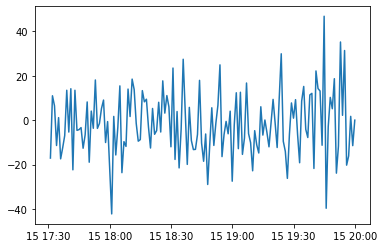

In [ ]:
plt.plot(result)

In [ ]:

new_array_scaled = scaler_dataframe.inverse_transform(new_array)

In [ ]:
new_array_scaled

array([[-4.6556387 ],
       [ 5.5023212 ],
       [ 1.3332042 ],
       [-0.6717302 ],
       [-0.09813108]], dtype=float32)

In [ ]:
new_array_scaled_dataframe = pd.DataFrame(new_array_scaled)

In [ ]:
new_array_scaled_dataframe.head(1)

,0
0,-4.655639


In [ ]:
new_array_scaled_dataframe.columns = ["Previous_and_Next_15_Minutes_Prediction"]

In [ ]:
import pytz

In [ ]:
Today= datetime.datetime.now(tz=pytz.timezone('US/Eastern'))


In [ ]:
Today

datetime.datetime(2022, 9, 16, 7, 58, 21, 1756, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>)

In [ ]:
date_list = [Today + datetime.timedelta(minutes=1*x) for x in range(0, 5)]


In [ ]:
datetext=[x.strftime('%Y-%m-%d %H:%M:%S') for x in date_list]


In [ ]:
datetext

['2022-09-16 07:58:21',
 '2022-09-16 07:59:21',
 '2022-09-16 08:00:21',
 '2022-09-16 08:01:21',
 '2022-09-16 08:02:21']

In [ ]:
datatext = pd.DataFrame(datetext)

In [ ]:
datatext.columns =['Datetime']


In [ ]:
datatext['Datetime'] = pd.to_datetime(datatext['Datetime'])


In [ ]:
datatext.dtypes

Datetime    datetime64[ns]
dtype: object

In [ ]:
combine = pd.concat([datatext, new_array_scaled_dataframe], axis =1)

In [ ]:
combine = combine.set_index("Datetime")

In [ ]:
frames = [result, combine]
  
final = pd.concat(frames)
display(final)

,Previous_and_Next_15_Minutes_Prediction
Datetime,
2022-09-15 13:31:00-04:00,-17.050781
2022-09-15 13:32:00-04:00,10.970703
2022-09-15 13:33:00-04:00,6.439453
2022-09-15 13:34:00-04:00,-11.390625
2022-09-15 13:35:00-04:00,1.140625
...,...
2022-09-16 07:53:54,-4.655639
2022-09-16 07:54:54,5.502321
2022-09-16 07:55:54,1.333204


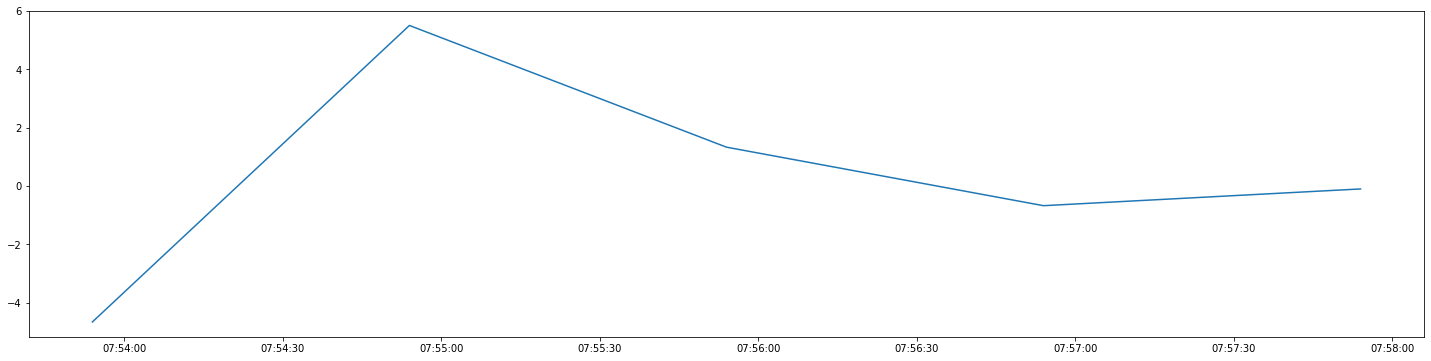

In [ ]:
plt.figure(figsize = (25, 6))
plt.plot(combine)

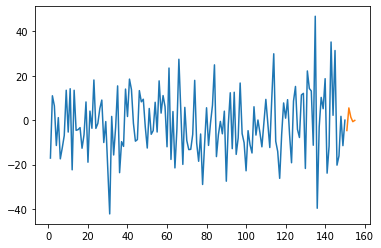

In [ ]:
day_new=np.arange(1,151)
day_pred=np.arange(151,156)
plt.plot(day_new,values_2_scaled)
#plt.plot(result)
plt.plot(day_pred,new_array_scaled)

Predictions


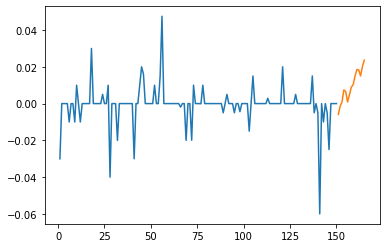

Predictions


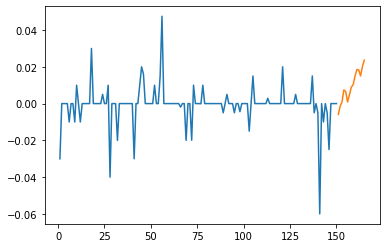

Predictions


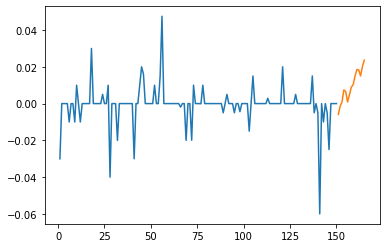

Predictions


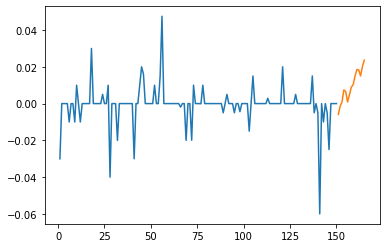

KeyboardInterrupt: ignored

In [ ]:
while True:
  day_new=np.arange(1,151)
  day_pred=np.arange(151,166)
  plt.plot(day_new,values_2_scaled)
  #plt.plot(result)
  plt.plot(day_pred,new_array_scaled)
  print("Predictions")
  plt.show()
  time.sleep(5)
